In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
titanic_df = pd.read_csv('train.csv')

In [3]:
#kolom dari dataframe
#survived menandakan selamat apa tidak, 0 artinya tidak, 1 artinya survive 
#SibSp artinya apakah ada Sibling atau tidak, ini jumlah/integer, bukan boolean 
#Parch artinya punya parent atau children di kapal, ini jumlah/integer, bukan boolean  
#Cabin NaN artinya tidak diketahui 
#Embarked menandakan cities (?)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#mengetahui value non-null dari kolom yang ada
#kolom cabin banyak value yang bernilai null (missing data)
#meski demikian, kolom Embarked dan kolom Age juga memiliki kolom null 
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Untuk melakukan analisa, ada beberapa basic question yang perlu dijawab terlebih dahulu: 
1. Siapa saja penumpang Titanic?
2. Ada di deck mana dan apa hubungannya dengan class mereka?
3. Dari mana penumpang berasal? 
4. Siapa yang sendiri dan siapa yang bersama sanak keluarga?

Kemudian kita dig deeper dengan pertanyaan: 
5. Faktor apa yang membuat seseorang selamat?

## Pertanyaan pertama

In [5]:
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

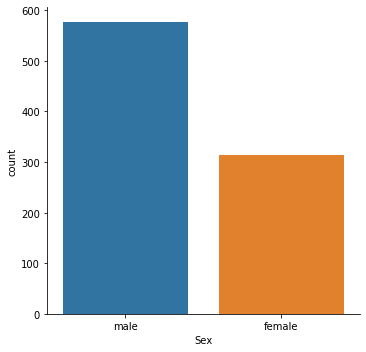

In [6]:
#melihat gender
#apa kegunaan dari catplot dan factorplot? 
#Menurut udemy factorplot atau yang sekarang disebut sebagai catplot berfungsi untuk passed parameter kolom saja
#apa kegunaan dari kind? 
#kemungkinan besar parameter kind digunakan untk menghitung 
#jika melihat di dokumentasi, kind untuk mengetahui jenis dari plot yang dipilih 
#Opsi dari kind antara lain adalah: “point”, “bar”, “strip”, “swarm”, “box”, “violin”, or “boxen”.
sns.catplot(x='Sex', data=titanic_df, kind='count')

#jika melihat grafik, male jauh lebih banyak dibanding female 

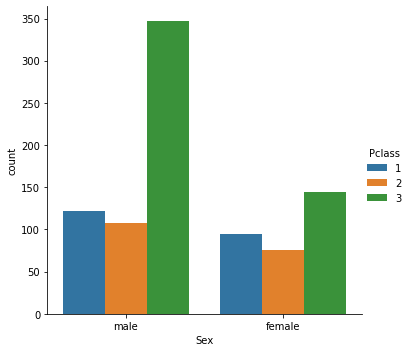

In [7]:
sns.catplot('Sex',data=titanic_df, hue='Pclass',kind='count')

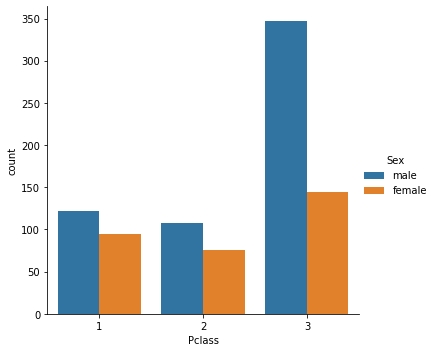

In [8]:
sns.catplot('Pclass',data=titanic_df, hue='Sex',kind='count')
#much more male in third class dan female 

In [9]:
#Melihat male, female, and children 
#dengan cara membuat function

#if they are younger than 16, maka they no longer a male or female but a child
def male_female_child(passenger):
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [10]:
#fungsi apply bisa memasukkan fungsi ke dalam kolom
#perhatikan bahwa axis=1 artinya implementasi method tersebut ke kolom, bukan ke baris 
#titanic_df['person'] artinya membuat kolom baru dengan fungsi seperti yang sudah didefinisikan 
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis=1)

In [11]:
#perhatikan ada value 'child'
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In [12]:
#kolom seperti di bawah juga bisa, hal ini mendefiniskan bahwa kolom person akan sama seperti kolom sex
#titanic_df['person'] = titanic_df['Sex']

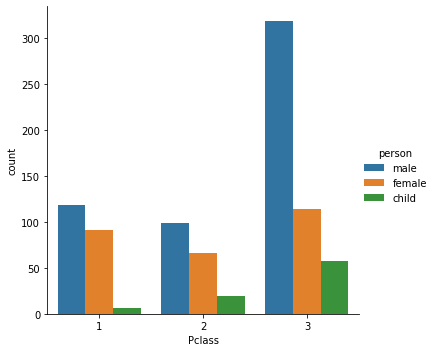

In [13]:
sns.catplot('Pclass', data=titanic_df, hue='person', kind='count')
#anehnya jauh lebih banyak child di 3rd class dibandingkan class 1 dan class 2

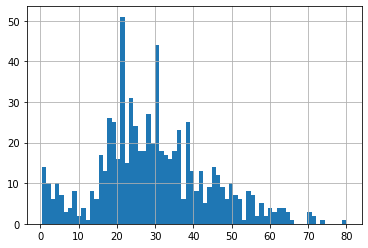

In [14]:
#melihat distribusi umur 
#terlihat banyak penumpang berumur balita dan semakin menurut sampai umut 10 tahun
#lalu meningkat lagi di umur awal 20an, menurun lagi pertengahan 20 sampai meningkat lagi di awal 30 tahunan dsb
titanic_df['Age'].hist(bins=70)

In [15]:
#melihat rata-rata
titanic_df['Age'].mean()

29.69911764705882

In [16]:
#ada 537 cowok, 271 cewek, dan 83 anak-anak
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

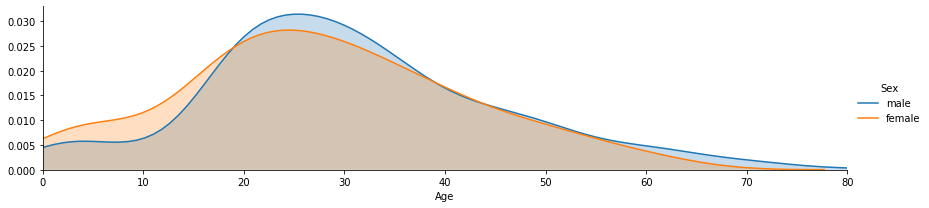

In [17]:
#menggunakan KDE (?)

#membuat object figure
#aspect merupakan aspect ration
fig = sns.FacetGrid(titanic_df, hue='Sex',aspect=4)
#map kdeplot dari kolom Age
fig.map(sns.kdeplot, "Age", shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

#grafik female vs male 

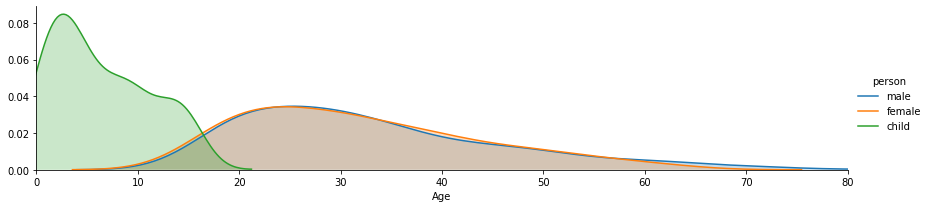

In [18]:
#membuat object figure
#aspect merupakan aspect ration
fig = sns.FacetGrid(titanic_df, hue='person',aspect=4)
#map kdeplot dari kolom Age
fig.map(sns.kdeplot, "Age", shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

#sebenarnya tidak begitu mengerti kegunaan dari kde plot apa
#lalu grafik child masih ada sampai 20, cuma kata tutor, itu hanyalah bandwith saja 

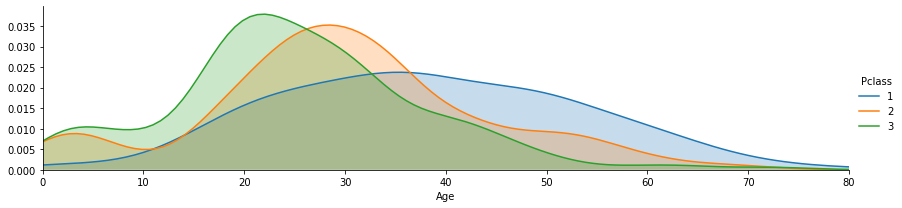

In [19]:
#membuat kde bersadar class 
fig = sns.FacetGrid(titanic_df, hue='Pclass',aspect=4)

fig.map(sns.kdeplot, "Age", shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()
#fist class distribusi normal
#2nd and 3rd class skewed ke kanan, menuju 20-30 tahun 

## Pertanyaan kedua: what deck was a passenger on dan relasinya dengan class 

In [20]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [21]:
#menghapus semua cabin yang bernilai null
#akan tetapi akan terlalu banyak baris yang didrop karena Cabin yang bernilai null setahu saya cukup banyak 
deck = titanic_df['Cabin'].dropna()

In [22]:
#first five dari deck yang tidak memiliki value null
#informasinya adalah cabin deck (A-B-C-D-E) dan cabin number (10,20,30,40, dsb)
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

E:\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


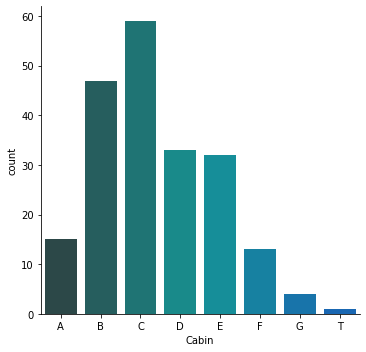

In [23]:
levels = []

#mengambil character atau item pertama di dalam deck
for level in deck:
    levels.append(level[0])

#harus dilakukan sorting terlebih dahulu untuk membuat value menjadi alfabetikal 
levels.sort()

cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

#referensi pallete dari cabin: https://matplotlib.org/tutorials/colors/colormaps.html
#kalau ditambah _d artinya jadi lebih dark
sns.factorplot('Cabin', data=cabin_df, palette='winter_d', kind='count')

In [24]:
cabin_df.tail()

,Cabin
199,G
200,G
201,G
202,G
203,T


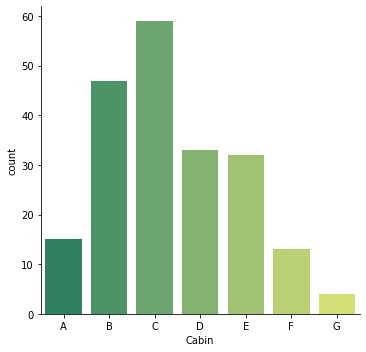

In [25]:
#ada Cabin T yang sebenarnya tidak masuk akal, karena memang sebenarnya tidak ada
#maa kita akan menghapus cabin T terlebih dahulu

#tidak diambil dari A karena dilihat dari yang didapatkan paling pertama
#kemungkinan besar jika ingin diurutkan, maka harus buat fungsi sort dulu (?)
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.catplot('Cabin', data=cabin_df, palette='summer', kind='count')

In [26]:
cabin_df.count()

Cabin    203
dtype: int64

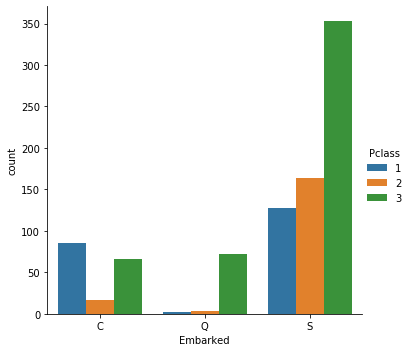

In [27]:
#kita juga bisa mengirimkan parameter order untuk mengurutkan nilai dari Embarked (kota)
sns.factorplot('Embarked', data=titanic_df, hue='Pclass', order=['C','Q','S'], kind='count')

#sebagian besar yang berasal dari Queensland merupakan 3rd class (bagaimana ekonomi dari Queensland pada tahun tersebut?)
#Kota 'C' paling banyak dari 1st class, perlu dilihat persebaran ekonominya juga  

## Pertanyaan ketiga: who alone and who with family?

In [28]:
#definisikan apa yang dimaksud dengan 'alone'

#alone artinya SibSp 0 dan Parch 0 sebagai passenger Titanic
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [29]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [30]:
titanic_df['Alone']
#alone artinya value tersebut harus bernilai 0

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

In [31]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0 ] = 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'
#di bawah merupakan warning apa? 

#masih tidak begitu mengerti apa kegunaan dari warning, mungkin akan baca lagi
#Link: https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas

#mungkin ada hubungannya dengan copy dari dframe dan ubah langsung yang menurut saya cukup rumit juga 

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [32]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


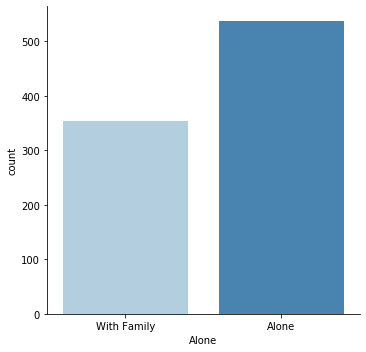

In [33]:
sns.catplot('Alone', data=titanic_df, palette='Blues', kind='count')
#ternyata completely alone lebih banyak daripada yang sama family 

## Pertanyaan terakhir: apa faktor yang membuat orang selamat?

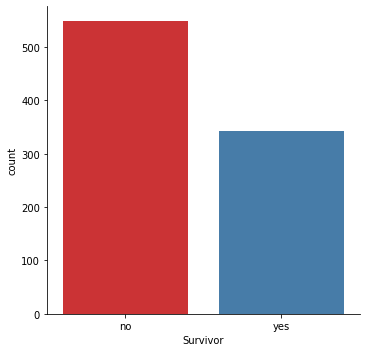

In [34]:
#map udah pernah diajarkan sebelumnya, jadi agak sama seperti mengubah suatu value menjadi value yang lain
titanic_df['Survivor'] = titanic_df.Survived.map({0: 'no', 1:'yes'})

sns.catplot('Survivor', data=titanic_df, palette='Set1', kind='count')

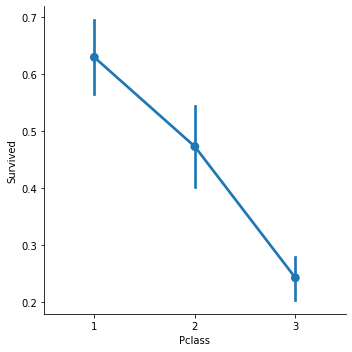

In [35]:
#melihat apakah class mempengaruhi keselamatan (just like in the movie)
#sangat tidak mengerti maksud dari grafik selain class tiga jauh lebih sedikit yang selamat, sedangkan class 1 jauh lebih banyak selamat
#tapi apa maksud dari angka-angka di bagian y? apakah rata-rata atau apa? 

#sepertinya y merupakan rata-rata atau central tendency sedangkan garis merupakan uncertainy dari central tendency
#garis  bisa juga sebagai standard deviasi 
#bisa juga dibilang probability rate, class1 punya probability untuk survive lebih dari 60% sedangkan class 3 cuma kira2 25%

#dan plot yang menggambarkan grafik namanya adalah pointplot

#dokumentasi lebih lanjut: https://seaborn.pydata.org/generated/seaborn.pointplot.html#seaborn.pointplot
sns.factorplot('Pclass', 'Survived', data=titanic_df)

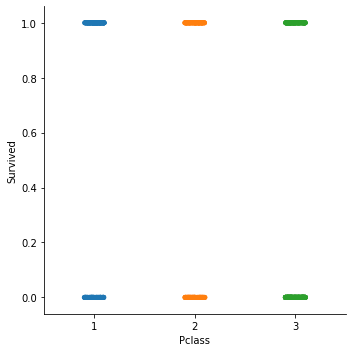

In [36]:
#tdaik bisa dan tidak guna dengan menggunakan catplot 
sns.catplot('Pclass', 'Survived', data=titanic_df)

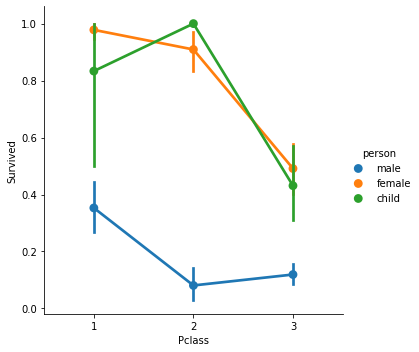

In [37]:
#melihat hubungan antara class dan gender dengan selamat atau tidak
#sepertinya menjadi male sangat tidak beruntung. probability untuk selamat rendah banget 
sns.factorplot('Pclass','Survived',hue='person', data=titanic_df)

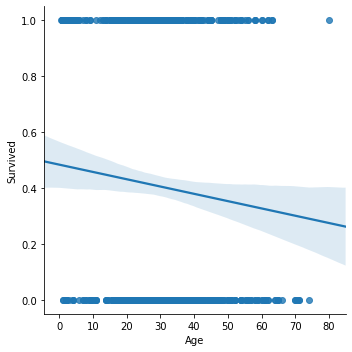

In [38]:
#general trend: semakin tua penumpang, semakin kecil probabilitasnya untuk selamat (lihat dari linear)
sns.lmplot('Age', 'Survived', data=titanic_df)

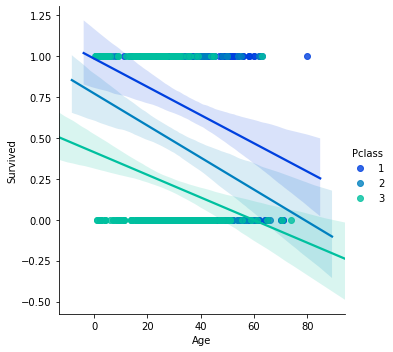

In [39]:
#class 3 masih rendah probabilitasnya 
sns.lmplot('Age','Survived', hue='Pclass', data=titanic_df, palette='winter')

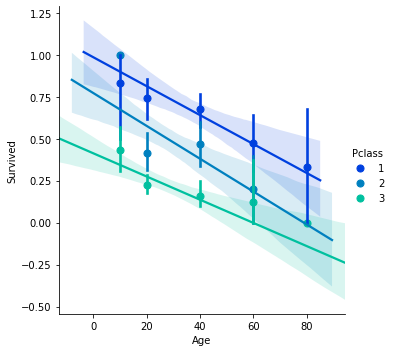

In [40]:
generations = [10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass', data=titanic_df, palette='winter', x_bins=generations)

#ada standard deviasi yang sangat tinggi di class 1 bins 80, artinya apa? 

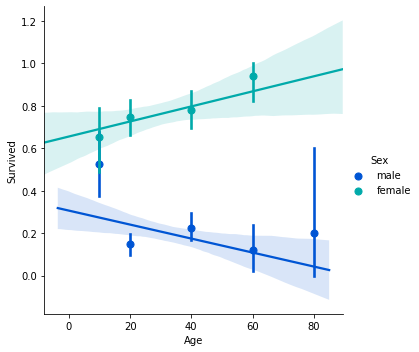

In [41]:
#melihat hubungannya dengan gender w/o jenis 'children'
sns.lmplot('Age','Survived',hue='Sex', data=titanic_df, palette='winter', x_bins=generations)

#semakin tua seorang female, chance of getting survived semakin tinggi
#akan tetapi berbanding terbalik dengan male,semakin tua maka semakin susah untuk selamat 
#akan tetapi, standard deviasi dari male tua cukup tinggi 

Beberapa pertanyaan lainnya: 
1. Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?
2. Did having a family member increase the odds of surviving the crash?

In [42]:
#Saya akan menjawab pertanyaan nomor satu terlebih dahulu
#Apakah deck mempengaruhi survival rate? 

## Pertanyaan pertama Challenge

In [120]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


In [141]:
#Cara pertama mungkin menggabungkan antara kolom Cabin dengan Survivor dulu
#ternyata tidak bisa menggunakan Survivor, karena datanya harus numerik
#setelah dipikir-pikir, benar juga bagaimana menghitung data yang tidak ada numerikalnya? 
cabsurv_df = titanic_df[['Cabin','Survived','Pclass']]

In [142]:
cabsurv_df = cabsurv_df.dropna()

In [143]:
cabsurv_df

,Cabin,Survived,Pclass
1,C85,1,1
3,C123,1,1
6,E46,0,1
10,G6,1,3
11,C103,1,1
21,D56,1,2
23,A6,1,1
27,C23 C25 C27,0,1
31,B78,1,1
52,D33,1,1


In [144]:
cabsurv_df.reset_index(drop=True, inplace=True)

In [145]:
cabsurv_df.head()

,Cabin,Survived,Pclass
0,C85,1,1
1,C123,1,1
2,E46,0,1
3,G6,1,3
4,C103,1,1


In [146]:
cabsurv_df.tail()

,Cabin,Survived,Pclass
199,D35,1,1
200,B51 B53 B55,0,1
201,C50,1,1
202,B42,1,1
203,C148,1,1


In [147]:
levels = []

#mengambil character atau item pertama di dalam deck
for level in cabsurv_df['Cabin']:
    levels.append(level[0])

deck_df = DataFrame(levels)
deck_df.columns = ['Deck']

deck_df.head()

,Deck
0,C
1,C
2,E
3,G
4,C


In [148]:
deck_df.tail()

,Deck
199,D
200,B
201,C
202,B
203,C


In [149]:
cabsurv_df['Cabin'] = deck_df

In [150]:
cabsurv_df.tail()

,Cabin,Survived,Pclass
199,D,1,1
200,B,0,1
201,C,1,1
202,B,1,1
203,C,1,1


In [151]:
cabsurv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 3 columns):
Cabin       204 non-null object
Survived    204 non-null int64
Pclass      204 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.9+ KB


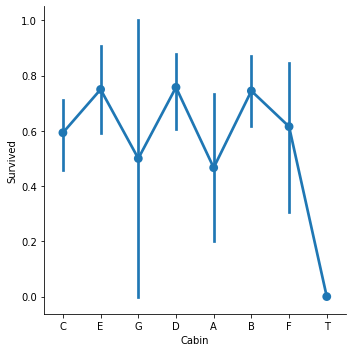

In [152]:
sns.factorplot('Cabin', 'Survived', data=cabsurv_df)

In [153]:
cabsurv_df = cabsurv_df[cabsurv_df['Cabin'] != 'T']

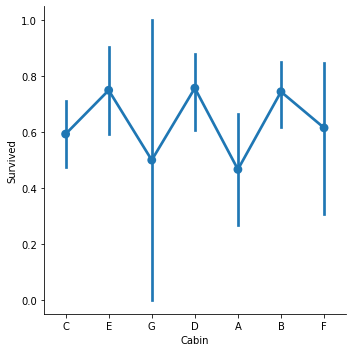

In [154]:
sns.factorplot('Cabin', 'Survived', data=cabsurv_df)
#class G sangat bervariasi, makanya memiliki probability 50%
#yang paling banyak selamat kelas E, D, dan B

In [159]:
cabsurv_df.head()

,Cabin,Survived,Pclass
0,C,1,1
1,C,1,1
2,E,0,1
3,G,1,3
4,C,1,1


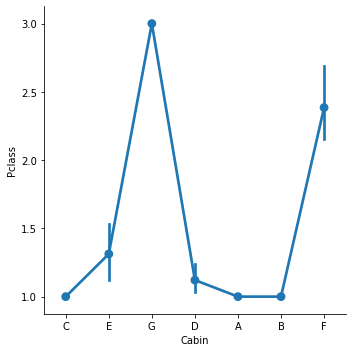

In [160]:
#ingin melakukan analisis suatu class lebih banyak berada di mana, cuma sekarang saya masih belum mengetahui caranya
ns.factorplot('Cabin', 'Pclass', data=cabsurv_df)
#bagaimana cara yang tepat untuk menganalisa dua data kategorikal? 
#sepertinya memang belum diajari

## Pertanyaan kedua challenge

In [161]:
#Did having a family member increase the odds of surviving the crash?

In [162]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


In [163]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
person         891 non-null object
Alone          891 non-null object
Survivor       891 non-null object
dtypes: float64(2), int64(5), object(8)
memory usage: 104.5+ KB


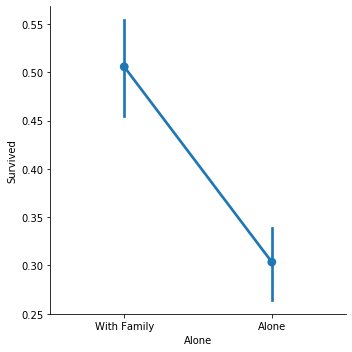

In [164]:
#Apakah perbedaannya cukup signifikan? orang yang bersama keluarga puya chance kisaran 51% untuk selamat
#Sementara sendiri cuma 31%an 
sns.factorplot('Alone', 'Survived', data=titanic_df)